In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [50]:
import os
os.chdir('/home/tapas/Downloads/Mckinsey/')
df_train = pd.read_csv('tr_1.csv')
df_test = pd.read_csv('te.csv')

In [51]:
df_train.columns

Index(['Junction', 'ID', 'year', 'month', 'day', 'time', 'dec_date',
       'Vehicles'],
      dtype='object')

In [49]:
df_test.columns

Index(['Junction', 'ID', 'year', 'month', 'day', 'dec_date', 'time'], dtype='object')

In [55]:
all_data = pd.concat((df_train.loc[:,'Junction':'dec_date'],
                      df_test.loc[:,'Junction':'time']))

In [56]:
all_data.head(5)

,ID,Junction,day,dec_date,month,time,year
0,20151101001,1,1,2015.832877,11,0,2015
1,20151101011,1,1,2015.832877,11,1,2015
2,20151101021,1,1,2015.832877,11,2,2015
3,20151101031,1,1,2015.832877,11,3,2015
4,20151101041,1,1,2015.832877,11,4,2015


In [57]:
all_data.tail(5)

,ID,Junction,day,dec_date,month,time,year
11803,20171031194,4,31,2017.830137,10,19,2017
11804,20171031204,4,31,2017.830137,10,20,2017
11805,20171031214,4,31,2017.830137,10,21,2017
11806,20171031224,4,31,2017.830137,10,22,2017
11807,20171031234,4,31,2017.830137,10,23,2017


In [58]:
#descriptive statistics summary
df_train['Vehicles'].describe()

count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64

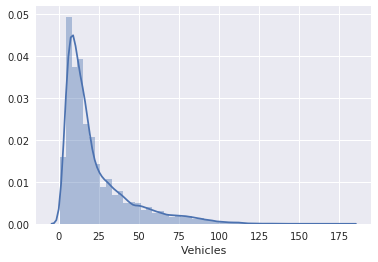

In [59]:
#histogram
sns.distplot(df_train['Vehicles']);

In [60]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Vehicles'].skew())
print("Kurtosis: %f" % df_train['Vehicles'].kurt())

Skewness: 1.819655
Kurtosis: 3.391795


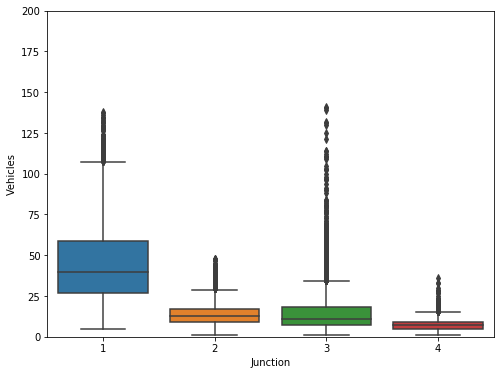

In [14]:
#box plot overallqual/saleprice
var = 'Junction'
data = pd.concat([df_train['Vehicles'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Vehicles', data=data)
fig.axis(ymin=0, ymax=200);

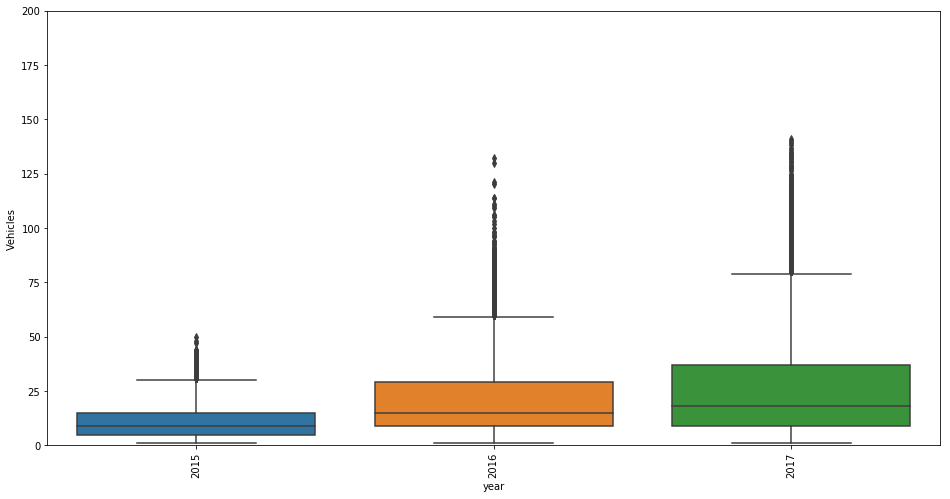

In [15]:
var = 'year'
data = pd.concat([df_train['Vehicles'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Vehicles', data=data)
fig.axis(ymin=0, ymax=200);
plt.xticks(rotation=90);

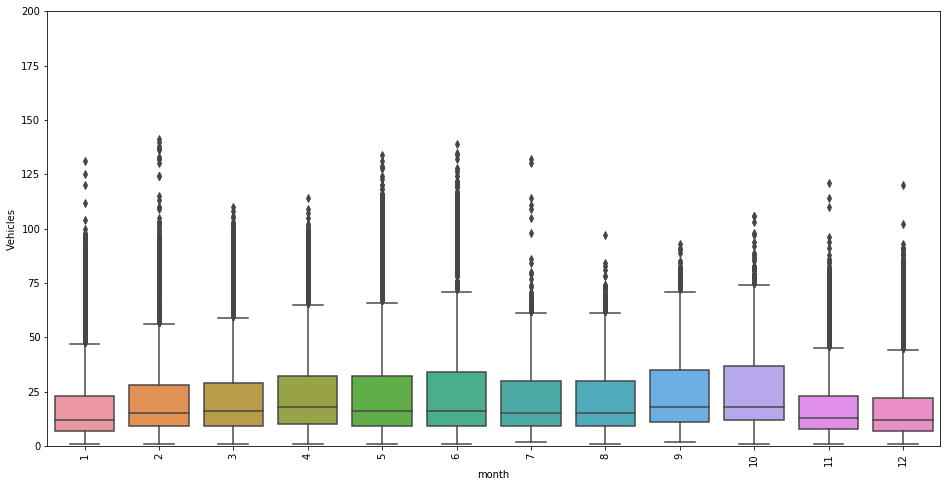

In [16]:
var = 'month'
data = pd.concat([df_train['Vehicles'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Vehicles', data=data)
fig.axis(ymin=0, ymax=200);
plt.xticks(rotation=90);

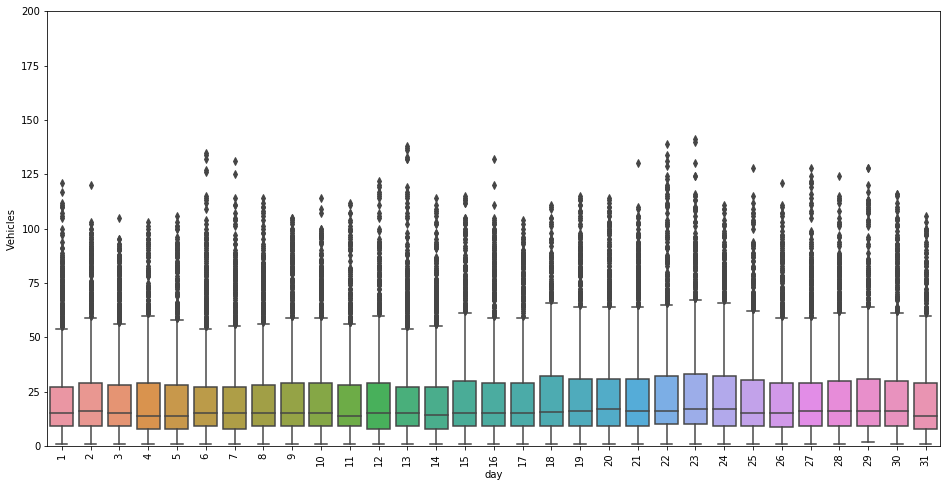

In [17]:
var = 'day'
data = pd.concat([df_train['Vehicles'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Vehicles', data=data)
fig.axis(ymin=0, ymax=200);
plt.xticks(rotation=90);

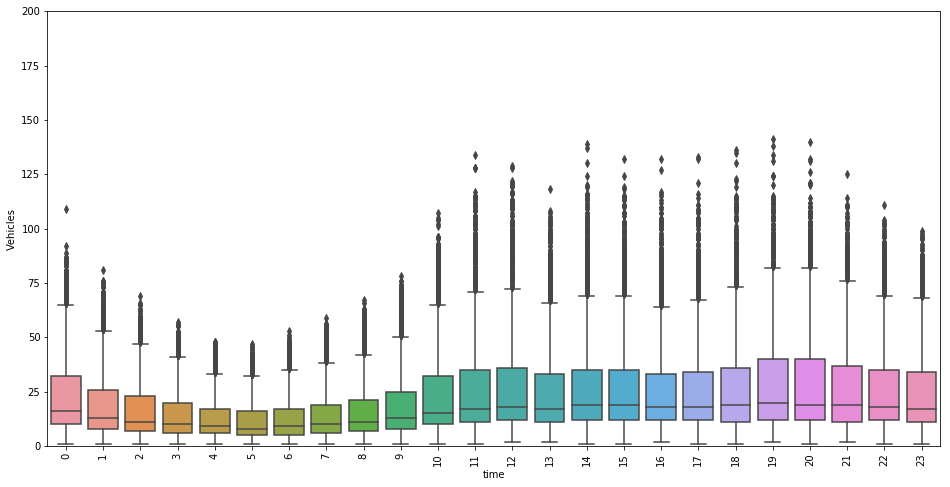

In [18]:
var = 'time'
data = pd.concat([df_train['Vehicles'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Vehicles', data=data)
fig.axis(ymin=0, ymax=200);
plt.xticks(rotation=90);

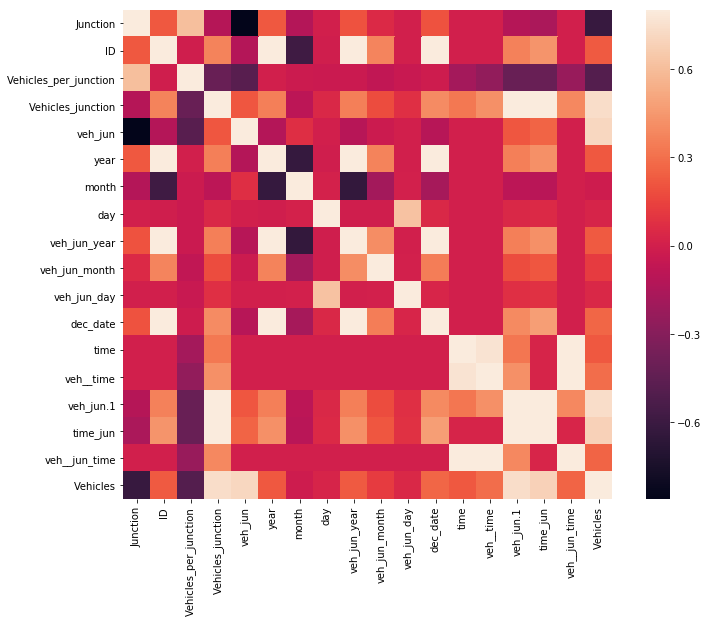

In [19]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

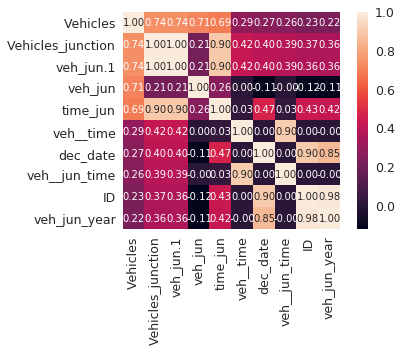

In [20]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Vehicles')['Vehicles'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

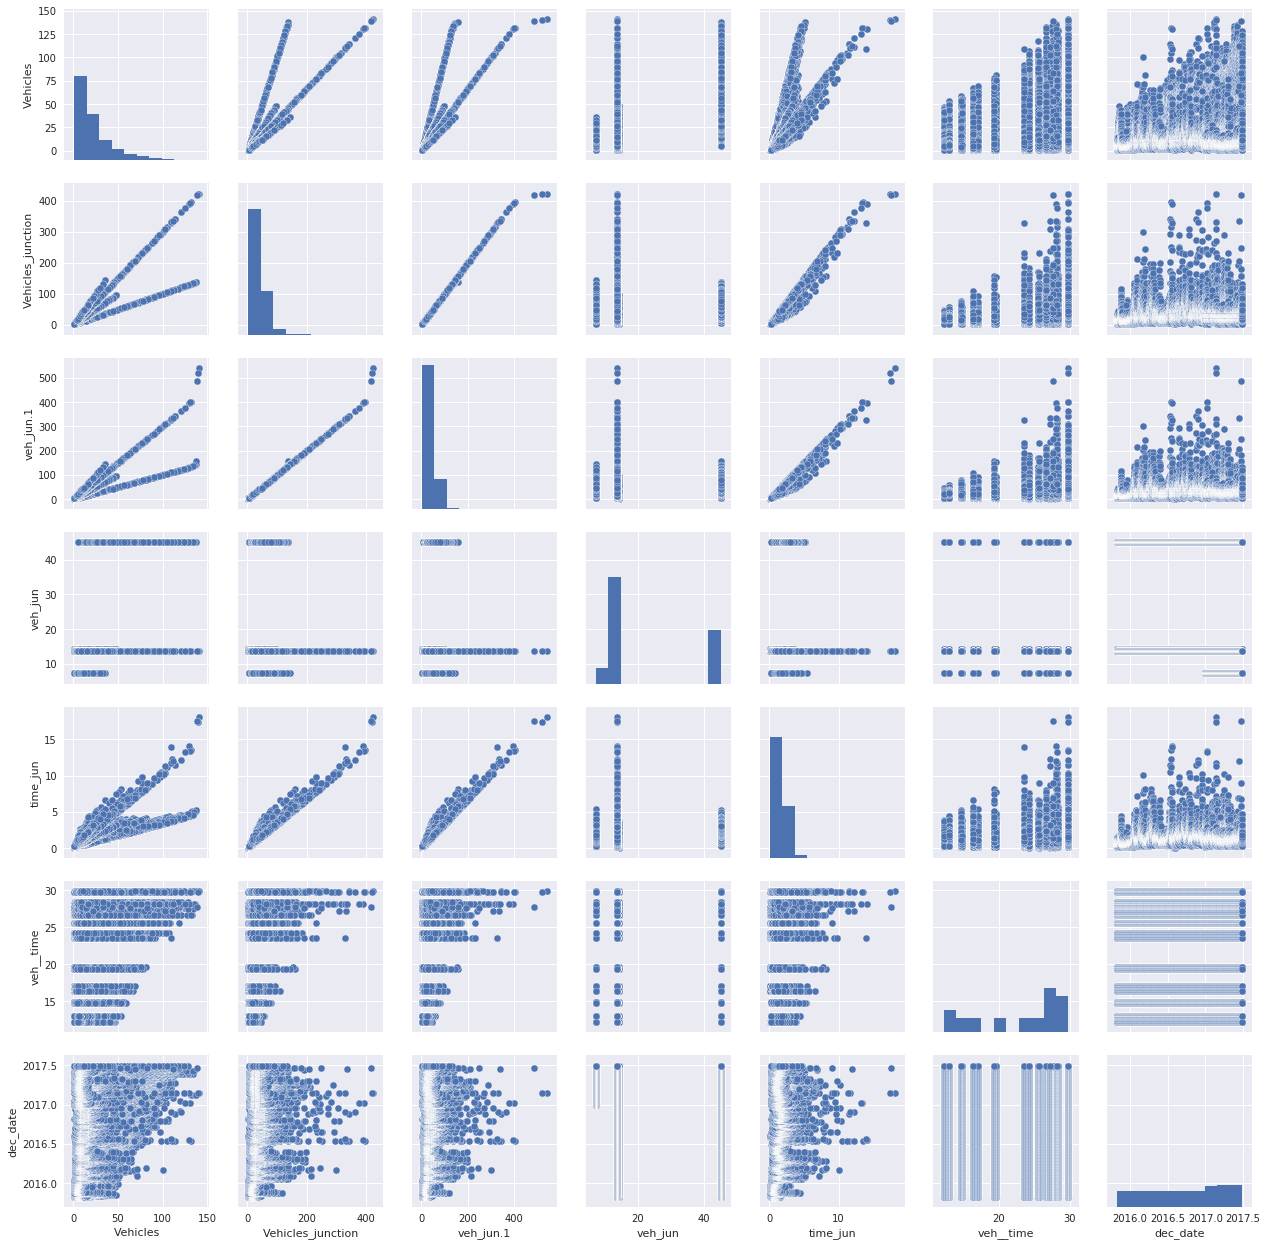

In [23]:
#scatterplot
sns.set()
cols = ['Vehicles', 'Vehicles_junction', 'veh_jun.1', 'veh_jun', 'time_jun', 'veh__time', 'dec_date']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [24]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

,Total,Percent
Vehicles,0,0.0
veh__jun_time,0,0.0
ID,0,0.0
Vehicles_per_junction,0,0.0
Vehicles_junction,0,0.0
veh_jun,0,0.0
year,0,0.0
month,0,0.0
day,0,0.0
veh_jun_year,0,0.0


In [61]:
#standardizing data
Vehicles_scaled = StandardScaler().fit_transform(df_train['Vehicles'][:,np.newaxis]);
low_range = Vehicles_scaled[Vehicles_scaled[:,0].argsort()][:10]
high_range= Vehicles_scaled[Vehicles_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]
 [-1.05019253]]

outer range (high) of the distribution:
[[ 5.40768644]
 [ 5.45587957]
 [ 5.45587957]
 [ 5.64865208]
 [ 5.6968452 ]
 [ 5.79323146]
 [ 6.4197421 ]
 [ 6.70890086]
 [ 7.23902526]
 [ 7.57637714]]


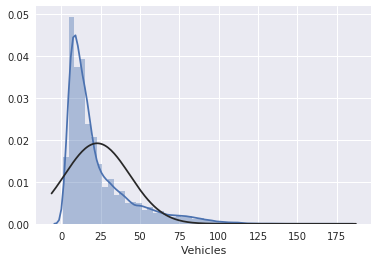

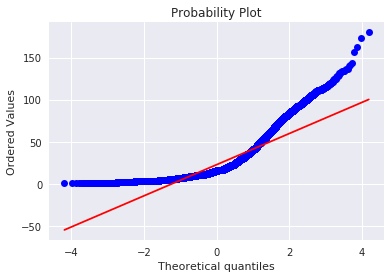

In [62]:
#histogram and normal probability plot
sns.distplot(df_train['Vehicles'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Vehicles'], plot=plt)

'Vehicles' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [63]:
#applying log transformation
df_train['Vehicles'] = np.log(df_train['Vehicles'])

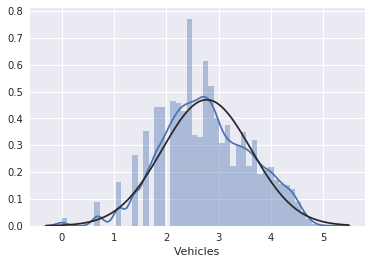

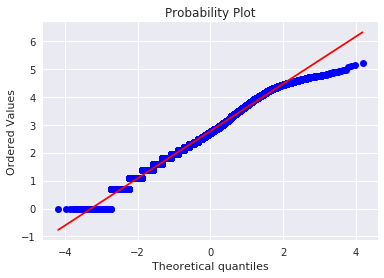

In [64]:
#transformed histogram and normal probability plot
sns.distplot(df_train['Vehicles'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Vehicles'], plot=plt)

In [65]:
#convert categorical variable into dummy
all_data["Junction"] = all_data["Junction"].astype("category")
all_data = pd.get_dummies(all_data, columns = ["Junction"], prefix="J")

In [66]:
all_data["year"] = all_data["year"].astype("category")
all_data = pd.get_dummies(all_data, columns = ["year"], prefix="y")

In [68]:
all_data["month"] = all_data["month"].astype("category")
all_data = pd.get_dummies(all_data, columns = ["month"], prefix="m")

In [70]:
df_train.shape

(48120, 8)

In [71]:
#creating matrices for sklearn:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y = df_train.Vehicles

# Models

In [75]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [76]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our
model is. The higher the regularization the less prone our model will be to overfit. However it will also lose 
flexibility and might not capture all of the signal in the data.

In [84]:
alphas = [1e-3,1e-2,0.05, 0.1, 0.3, 1]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

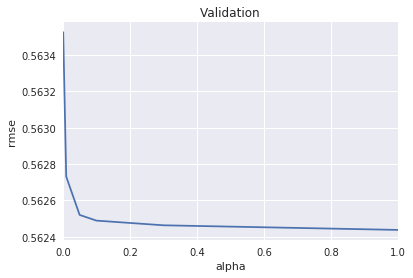

In [85]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [86]:
cv_ridge.min()

0.5624377881367314

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot
capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins 
to overfit. A value of alpha = 10 is about right based on the plot above.

In [87]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [88]:
rmse_cv(model_lasso).mean()

0.51880841999992167

In [89]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [90]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 5 variables


One thing to note here however is that the features selected are not necessarily the "correct" ones - especially 
since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on 
boostrapped samples and see how stable the feature selection is.

In [91]:
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

In [92]:
imp_coef

J_4        -0.922123
m_1        -0.155058
m_5        -0.054027
m_6        -0.047293
m_8        -0.024022
m_3        -0.022989
J_3        -0.000261
m_7         0.000000
m_4         0.000000
y_2017     -0.000000
day         0.002576
m_2         0.003856
time        0.031370
y_2016      0.089213
m_10        0.100632
m_9         0.100645
m_11        0.103056
J_2         0.137912
dec_date    0.322799
J_1         1.278656
dtype: float64

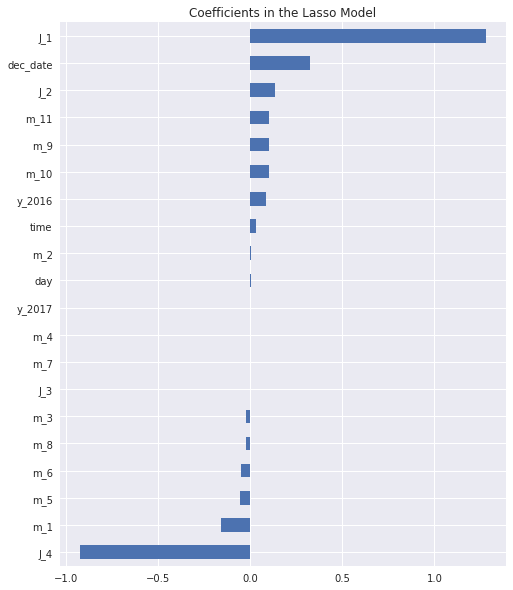

In [94]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is Junction 1. 
Some of the negative features make less sense and would be worth looking into more - 
it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you  get from a random forest these are actual coefficients in your model 
- so you can say precisely why the predicted Vehichles is what it is. The only issue here is that we log_transformed both 
the target and the numeric features so the actual magnitudes are a bit hard to interpret.

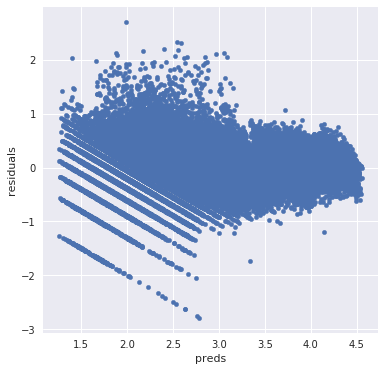

In [95]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [98]:
import xgboost as xgb

In [99]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

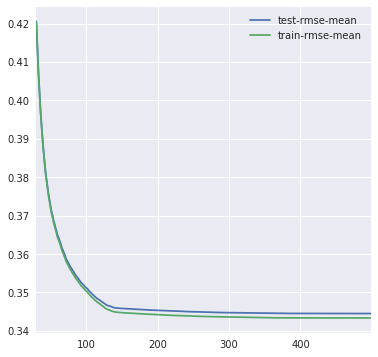

In [100]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [101]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [102]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

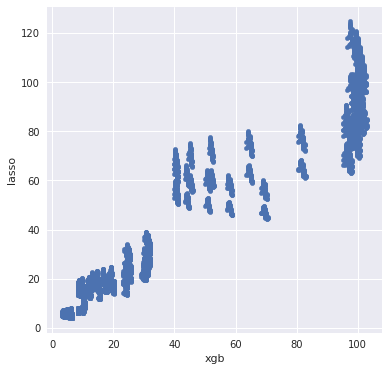

In [103]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [107]:
preds = 0.6*lasso_preds + 0.3*xgb_preds

In [108]:
solution = pd.DataFrame({"Vehicles":preds,"ID":df_test.ID})
solution.to_csv("solution_1.csv", index = False)